In [ ]:
file1 = ("/content/drive/MyDrive/wolf.vs.dogs/data")

from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(horizontal_flip=True)
train_data_gen = image_generator.flow_from_directory(directory=file1,
                                                     target_size = (384, 384),
                                                     batch_size =  4,
                                                     class_mode = 'binary',
                                                     subset='training')
val_data_gen = image_generator.flow_from_directory(directory=file1,
                                                    target_size = (384, 384),
                                                    batch_size = 2,
                                                    class_mode = 'binary',
                                                    subset='validation')

Found 1400 images belonging to 2 classes.
Found 600 images belonging to 2 classes.


In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(1,activation='relu', input_shape=[384, 384, 3]))
model.add(tf.keras.layers.Conv2D(128, kernel_size=[3,3], padding='valid', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=[3,3], strides=2, padding='valid'))
model.add(tf.keras.layers.Conv2D(64, kernel_size=[3,3], padding='valid', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=[3,3], strides=2, padding='valid'))
model.add(tf.keras.layers.Conv2D(32, kernel_size=[3,3],padding='valid', activation='relu' ))
model.add(tf.keras.layers.MaxPooling2D(pool_size=[3,3], strides=2, padding='valid'))
model.add(tf.keras.layers.Conv2D(16, kernel_size=[2,2],padding='valid', activation='relu' ))
model.add(tf.keras.layers.MaxPooling2D(pool_size=[2,2], strides=1, padding='valid'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.compile(optimizer = 'adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 384, 384, 1)       4         
_________________________________________________________________
conv2d (Conv2D)              (None, 382, 382, 128)     1280      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 190, 190, 128)     0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 188, 188, 64)      73792     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 93, 93, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 91, 91, 32)        18464     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 45, 45, 32)        0

In [ ]:
history = model.fit(train_data_gen, validation_data =val_data_gen, epochs=5, verbose=2)

Epoch 1/25
50/50 - 1451s - loss: 0.7088 - accuracy: 0.5831 - val_loss: 0.6453 - val_accuracy: 0.6725
Epoch 2/25
50/50 - 1201s - loss: 0.6267 - accuracy: 0.6544 - val_loss: 0.6586 - val_accuracy: 0.6775
Epoch 3/25
50/50 - 1194s - loss: 0.5936 - accuracy: 0.6919 - val_loss: 0.5906 - val_accuracy: 0.7325
Epoch 4/25
50/50 - 1194s - loss: 0.5179 - accuracy: 0.7350 - val_loss: 0.7192 - val_accuracy: 0.7050
Epoch 5/25
50/50 - 1197s - loss: 0.4744 - accuracy: 0.7788 - val_loss: 0.6812 - val_accuracy: 0.7025
Epoch 6/25
50/50 - 1200s - loss: 0.4385 - accuracy: 0.7987 - val_loss: 0.9714 - val_accuracy: 0.6575
Epoch 7/25
50/50 - 1197s - loss: 0.4021 - accuracy: 0.8144 - val_loss: 0.8808 - val_accuracy: 0.6800
Epoch 8/25
50/50 - 1203s - loss: 0.3326 - accuracy: 0.8469 - val_loss: 1.3114 - val_accuracy: 0.6750
Epoch 9/25
50/50 - 1208s - loss: 0.3036 - accuracy: 0.8631 - val_loss: 1.3549 - val_accuracy: 0.6925
Epoch 10/25
50/50 - 1206s - loss: 0.3104 - accuracy: 0.8662 - val_loss: 1.0636 - val_accura

[[0.04304329]]
This is 95.70 percent chance dog and 4.30  percent wolf.


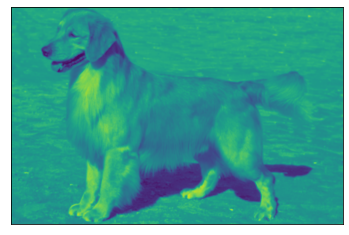

In [ ]:
import cv2

def prepare(image):
  IMG_SIZE=384
  img_array = cv2.imread('/golden retriever.jpg', cv2.IMREAD_COLOR)
  new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
  return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)

y=model.predict([prepare('/golden retriever.jpg')])

print(y)
score = y[0]
print(
    "This is %.2f percent chance dog and %.2f  percent wolf."
    %(100*(1-score), 100*score)
)
from matplotlib import pyplot as plt

img = cv2.imread('/golden retriever.jpg',0)
plt.imshow(img, interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  
plt.show()

[[0.9203165]]
This is 7.97 percent chance dog and 92.03 percent wolf .


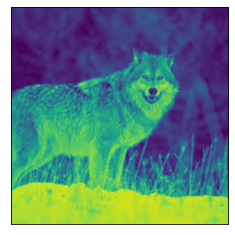

In [ ]:
import cv2

def prepare(image):
  IMG_SIZE=384
  img_array = cv2.imread('/wolf.jpg', cv2.IMREAD_COLOR)
  new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
  return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)

x=model.predict([prepare('/wolf.jpg')])

print(x)
score = x[0]
print(
    "This is %.2f percent chance dog and %.2f percent wolf ."
    %(100*(1-score), 100*score)
)
from matplotlib import pyplot as plt

img = cv2.imread('/wolf.jpg',0)
plt.imshow(img, interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  
plt.show()

[[0.0002164]]
This is 99.98 percent chance dog and 0.02 percent wolf .


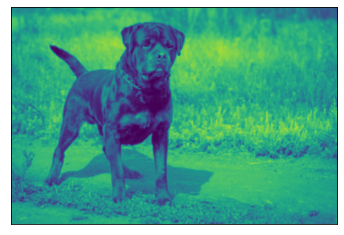

In [ ]:
import cv2

def prepare(image):
  IMG_SIZE=384
  img_array = cv2.imread('/rottweiler.jpg', cv2.IMREAD_COLOR)
  new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
  return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)

v=model.predict([prepare('/rottweiler.jpg')])

print(v)
score = v[0]
print(
    "This is %.2f percent chance dog and %.2f percent wolf ."
    %(100*(1-score), 100*score)
)
from matplotlib import pyplot as plt

img = cv2.imread('/rottweiler.jpg',0)
plt.imshow(img, interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  
plt.show()